<a href="https://colab.research.google.com/github/j-winfield/fastaidl/blob/master/Handwrittendigits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate


In [0]:
bs=64

In [29]:
path =untar_data(URLs.MNIST_SAMPLE);path


PosixPath('/root/.fastai/data/mnist_sample')

In [0]:

tfms=get_transforms(do_flip=False)
data=ImageDataBunch.from_folder(path,ds_tfms=tfms,size=36)
                                 

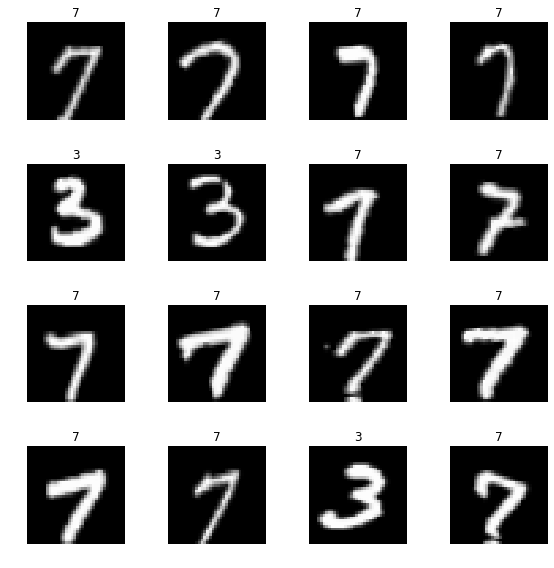

In [34]:
data.show_batch(figsize=(8,8),rows=4)

In [35]:
learn=cnn_learner(data,models.resnet34,metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:05<00:00, 15016299.11it/s]


In [37]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [38]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.124374,0.033695,0.013739,00:30
1,0.067977,0.021351,0.007851,00:29
2,0.051529,0.015722,0.006379,00:28
3,0.047487,0.014560,0.005397,00:29


In [0]:
learn.save('stage1')

In [0]:
interp=ClassificationInterpretation.from_learner(learn)


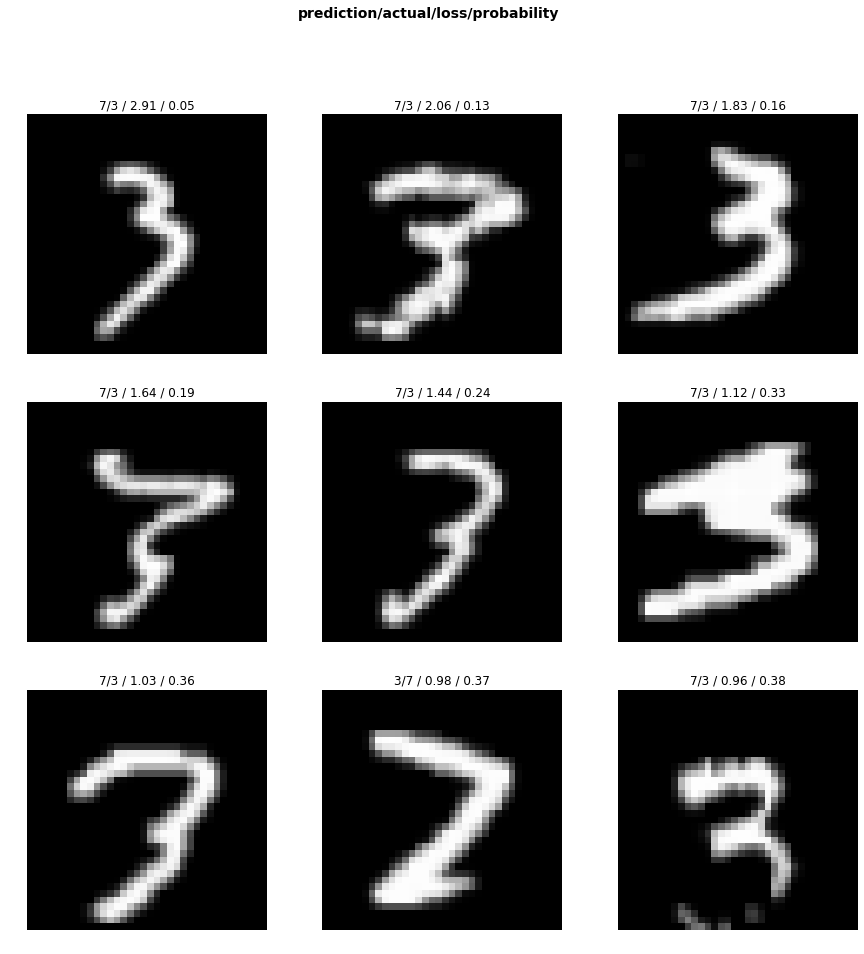

In [41]:
interp.plot_top_losses(9,figsize=(15,15))

In [0]:
 learn.unfreeze()

In [43]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.031124,0.011260,0.005397,00:28
1,0.030120,0.008169,0.003925,00:28


In [0]:
learn.save('stage2')

In [45]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


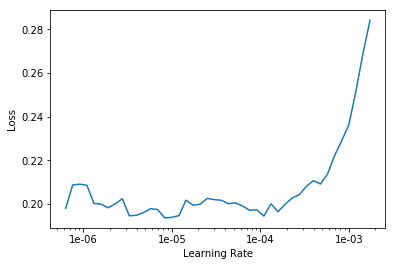

In [0]:
learn.recorder .plot()

In [0]:
learn.unfreeze()

In [47]:
learn.fit_one_cycle(2,max_lr=slice(8e-5,1e-05))

epoch,train_loss,valid_loss,error_rate,time
0,0.022213,0.006244,0.002944,00:32
1,0.010602,0.002950,0.000491,00:31


In [0]:
learn.save('stage2')

In [49]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


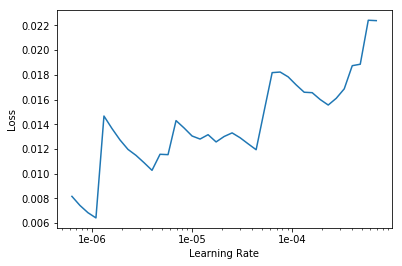

In [50]:
learn.recorder.plot()

In [0]:
learn.save('stage2')

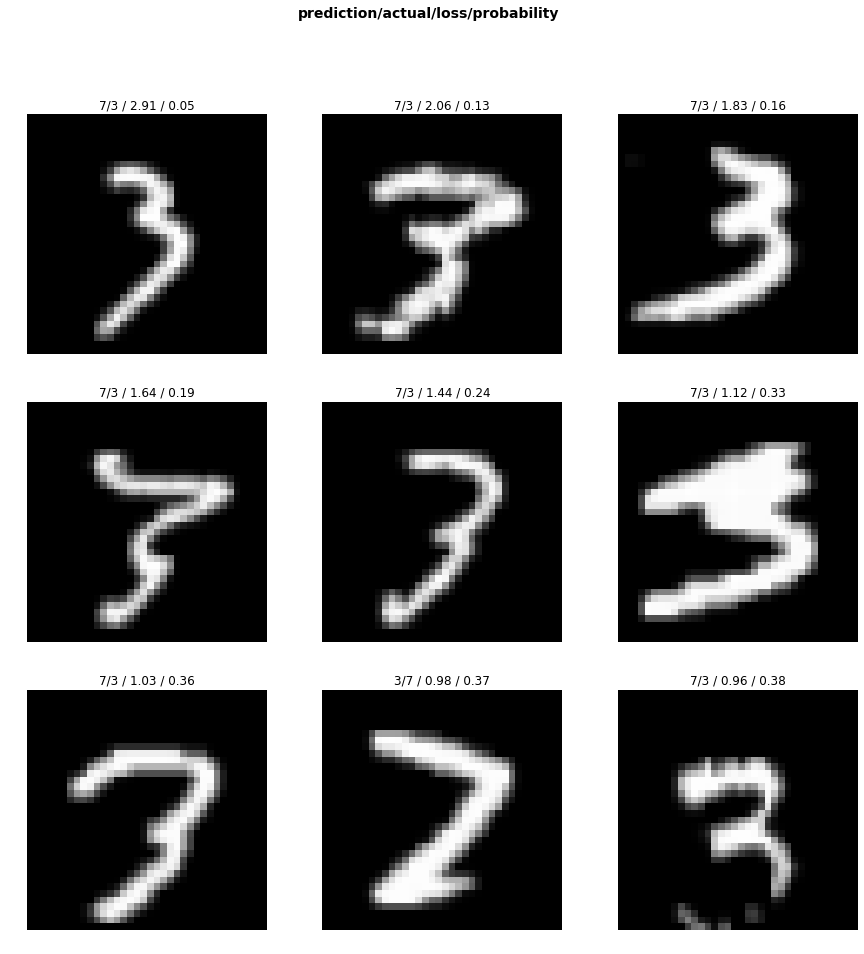

In [51]:
interp.plot_top_losses(9,figsize=(15,15))

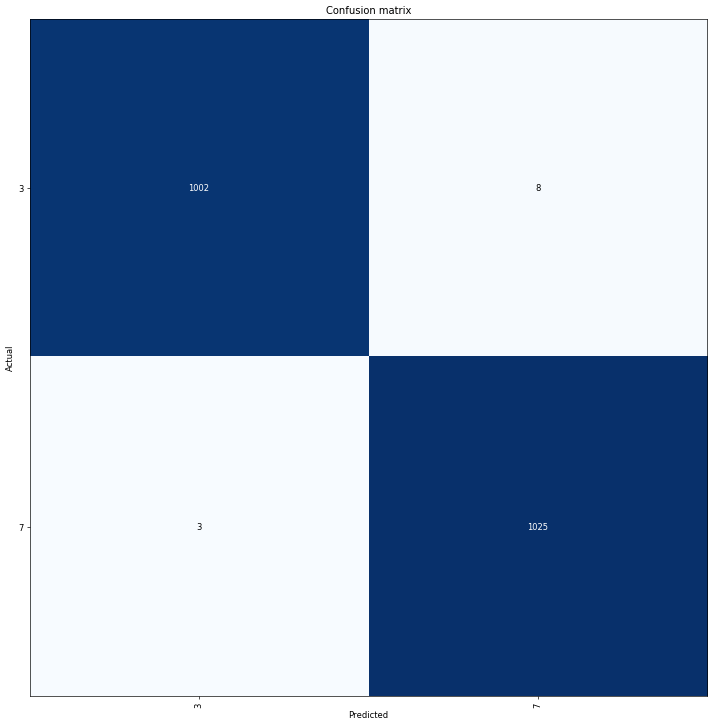

In [52]:
interp.plot_confusion_matrix(dpi=60,figsize=(12,12))